# Synthetic Financial Datasets For Fraud Detection


## Synthetic Financial Datasets : An Overview

Ever since the advent of internet the digital revolution has rising and has creeped into all aspects to our lives. One of the most important digital revolution happend in financial system and especially transacting money to someone from any part of the world digitally. Digital transactions have become a part of daily life like purchasing a product online, sending money to friends, depositing cash in bank account, investment purposes etc., They had a lot of benefits so does paved way for fradulent activities. People started using digital money transactions medium to launder money and make the money look like it comes from a legal source. This dataset (https://www.kaggle.com/ealaxi/paysim1) is presently only one of four on Kaggle with information on the rising risk of digital financial fraud, emphasizing the difficulty in obtaining such data.

## Problem statement


The main technical challenge it poses to predicting fraud is the highly imbalanced distribution between positive and negative classes in 6 million rows of data. Another stumbling block to the utility of this data stems from the possible discrepancies in its description.



## Headers


* **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).


* **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.


* **amount** - amount of the transaction in local currency.


* **nameOrig** - customer who started the transaction


* **oldbalanceOrg** - initial balance before the transaction


* **newbalanceOrig** - new balance after the transaction


* **nameDest** - customer who is the recipient of the transaction


* **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).


* **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).


* **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.


* **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


## Goals


* Exploratory analysis of data to extract the pattern of fraudlent activites.

* Build a machine learning model to classify fraud and non-fraud transactions.

* Reduce the false negatives by tuning the model.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report,roc_auc_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [49]:
df = pd.read_csv("/Users/nouf/Desktop/Synthetic-Financial-Datasets-For-Fraud-Detection/PS_20174392719_1491204439457_log.csv")

In [50]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [51]:
df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]

In [52]:
from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(df, test_size=0.92141601,random_state=1234, stratify=df["isFraud"])

In [53]:
df_sample

step      type     amount     nameOrig  oldbalanceOrg  \
4697164   331   CASH_IN  133005.64   C680739392     3167757.18   
4655487   330   PAYMENT   64485.36  C1065473491           0.00   
3065273   234   PAYMENT   11527.62   C397745410       13217.06   
3400257   255   CASH_IN   83631.99  C1715671278       21864.00   
4405604   321   PAYMENT   13185.96  C1539731069      225599.42   
...       ...       ...        ...          ...            ...   
4718156   332  TRANSFER  846909.93  C1176418861           0.00   
5668050   396   PAYMENT   16017.14   C550000618       81889.00   
3841828   282   PAYMENT    1139.82  C1140217339           0.00   
3588279   262  CASH_OUT  138101.65   C209628965      125279.72   
1574908   155   PAYMENT   23271.39   C222801209       19366.85   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
4697164      3300762.82   C669047127      4486834.39      4353828.75        0   
4655487            0.00   M242730382            0.00            0.00        0   
3065273         1689.44  M1141131093            0.00            0.00        0   
3400257       105495.99   C302766417      3624478.46      3540846.46        0   
4405604       212413.46   M558799553            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
4718156            0.00  C1547538271     10964923.28     11811833.22        0   
5668050        65871.86  M1357654180            0.00            0.00        0   
3841828            0.00   M970021800            0.00            0.00        0   
3588279            0.00  C1410964503       419780.30       557881.94        0   
1574908            0.00   M903810442            0.00            0.00        0   

         isFlaggedFraud  
4697164               0  
4655487               0  
3065273               0  
3400257               0  
4405604               0  
...                 ...  
4718156               0  
5668050               0  
3841828               0  
3588279               0  
1574908               0  

[500000 rows x 11 columns]

In [54]:
df_train, df_test = train_test_split(df_sample, test_size=0.2,random_state=123,stratify=df_sample["isFraud"])
df_train, df_val = train_test_split(df_train, test_size=0.25,random_state=123,stratify=df_train["isFraud"])

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 486548 to 4214666
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            300000 non-null  int64  
 1   type            300000 non-null  object 
 2   amount          300000 non-null  float64
 3   nameOrig        300000 non-null  object 
 4   oldbalanceOrg   300000 non-null  float64
 5   newbalanceOrig  300000 non-null  float64
 6   nameDest        300000 non-null  object 
 7   oldbalanceDest  300000 non-null  float64
 8   newbalanceDest  300000 non-null  float64
 9   isFraud         300000 non-null  int64  
 10  isFlaggedFraud  300000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 27.5+ MB


In [56]:
df_train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [57]:
#Drop Duplicates
df_train.drop_duplicates(keep=False, inplace=True)

In [58]:
df_train.shape

(300000, 11)

In [59]:
df_train

step      type     amount     nameOrig  oldbalanceOrg  \
486548     19   PAYMENT   33688.88  C1607102420            0.0   
5717510   398  CASH_OUT  425900.93   C444567143        16867.0   
1597387   156   PAYMENT    8471.67    C24524743       202415.0   
2758578   212  CASH_OUT  175655.64  C1947758025            0.0   
3122816   236  CASH_OUT  159605.73  C1961652135        30915.0   
...       ...       ...        ...          ...            ...   
512163     20  CASH_OUT   77482.84   C623262460            0.0   
826498     41   PAYMENT   18616.54   C459340122            0.0   
679287     36   CASH_IN   68840.71  C1154779678        21719.0   
4740194   332   PAYMENT     690.03  C1398262268            0.0   
4214666   305  CASH_OUT   52542.92  C1884091988       693254.0   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
486548             0.00  M1498412788            0.00            0.00        0   
5717510            0.00   C845492994       149745.41       575646.34        0   
1597387       193943.33  M2015857724            0.00            0.00        0   
2758578            0.00   C840858860      3393248.63      3568904.28        0   
3122816            0.00  C1277221049       178107.79       337713.51        0   
...                 ...          ...             ...             ...      ...   
512163             0.00  C1672395017       264467.11       341949.95        0   
826498             0.00   M210111217            0.00            0.00        0   
679287         90559.71   C865525056       118626.79        49786.08        0   
4740194            0.00  M1920254214            0.00            0.00        0   
4214666       640711.08   C743866055      1795877.50      1848420.42        0   

         isFlaggedFraud  
486548                0  
5717510               0  
1597387               0  
2758578               0  
3122816               0  
...                 ...  
512163                0  
826498                0  
679287                0  
4740194               0  
4214666               0  

[300000 rows x 11 columns]

In [60]:
df_train.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  300000.000000  3.000000e+05   3.000000e+05    3.000000e+05   
mean      243.518963  1.797030e+05   8.336019e+05    8.549314e+05   
std       141.901298  6.022078e+05   2.895000e+06    2.930307e+06   
min         1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%       156.000000  1.324180e+04   0.000000e+00    0.000000e+00   
50%       239.000000  7.426901e+04   1.392974e+04    0.000000e+00   
75%       334.000000  2.077247e+05   1.068955e+05    1.439608e+05   
max       742.000000  5.512957e+07   3.741827e+07    3.498450e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    3.000000e+05    3.000000e+05  300000.000000   300000.000000  
mean     1.097957e+06    1.221330e+06       0.001290        0.000003  
std      3.346001e+06    3.621448e+06       0.035893        0.001826  
min      0.000000e+00    0.000000e+00       0.000000        0.000000  
25%      0.000000e+00    0.000000e+00       0.000000        0.000000  
50%      1.305861e+05    2.120638e+05       0.000000        0.000000  
75%      9.426017e+05    1.111275e+06       0.000000        0.000000  
max      3.114049e+08    3.114929e+08       1.000000        1.000000

In [61]:
df_train

step      type     amount     nameOrig  oldbalanceOrg  \
486548     19   PAYMENT   33688.88  C1607102420            0.0   
5717510   398  CASH_OUT  425900.93   C444567143        16867.0   
1597387   156   PAYMENT    8471.67    C24524743       202415.0   
2758578   212  CASH_OUT  175655.64  C1947758025            0.0   
3122816   236  CASH_OUT  159605.73  C1961652135        30915.0   
...       ...       ...        ...          ...            ...   
512163     20  CASH_OUT   77482.84   C623262460            0.0   
826498     41   PAYMENT   18616.54   C459340122            0.0   
679287     36   CASH_IN   68840.71  C1154779678        21719.0   
4740194   332   PAYMENT     690.03  C1398262268            0.0   
4214666   305  CASH_OUT   52542.92  C1884091988       693254.0   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
486548             0.00  M1498412788            0.00            0.00        0   
5717510            0.00   C845492994       149745.41       575646.34        0   
1597387       193943.33  M2015857724            0.00            0.00        0   
2758578            0.00   C840858860      3393248.63      3568904.28        0   
3122816            0.00  C1277221049       178107.79       337713.51        0   
...                 ...          ...             ...             ...      ...   
512163             0.00  C1672395017       264467.11       341949.95        0   
826498             0.00   M210111217            0.00            0.00        0   
679287         90559.71   C865525056       118626.79        49786.08        0   
4740194            0.00  M1920254214            0.00            0.00        0   
4214666       640711.08   C743866055      1795877.50      1848420.42        0   

         isFlaggedFraud  
486548                0  
5717510               0  
1597387               0  
2758578               0  
3122816               0  
...                 ...  
512163                0  
826498                0  
679287                0  
4740194               0  
4214666               0  

[300000 rows x 11 columns]

# EDA

### 1 - isFraud

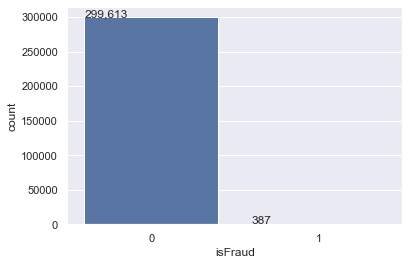

In [62]:
df_train['isFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df_train)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

### 2 - isFlaggedFraud

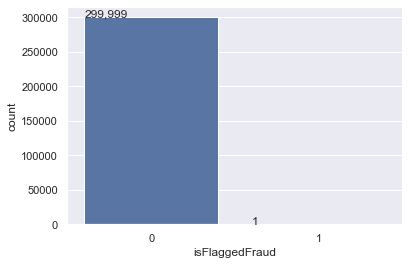

In [63]:
df_train['isFlaggedFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFlaggedFraud", data=df_train)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

### 3- type

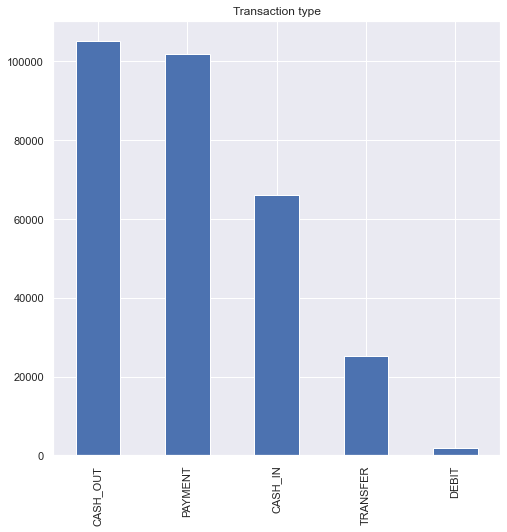

In [64]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df_train.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')

In [65]:
pd.crosstab(df_train['type'], df_train['isFraud'])

isFraud        0    1
type                 
CASH_IN    65987    0
CASH_OUT  104850  192
DEBIT       1955    0
PAYMENT   101920    0
TRANSFER   24901  195

/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


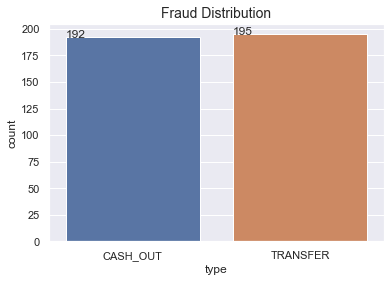

In [66]:
ax=sns.countplot('type', data=df_train[(df_train['isFraud'] == 1)])
plt.title('Fraud Distribution', fontsize=14)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

plt.show()

### 4 - step

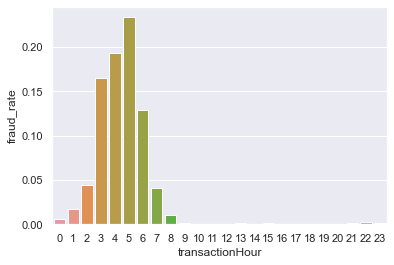

In [67]:
# transaction hour
df_train['transactionHour'] = df_train['step'] % 24

frauds_hour = pd.concat([df_train.groupby("transactionHour")["isFraud"].sum(),df_train.groupby("transactionHour")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

In [68]:
# converting into object type
df_train['transactionHour'] = df_train['transactionHour'].astype('object')

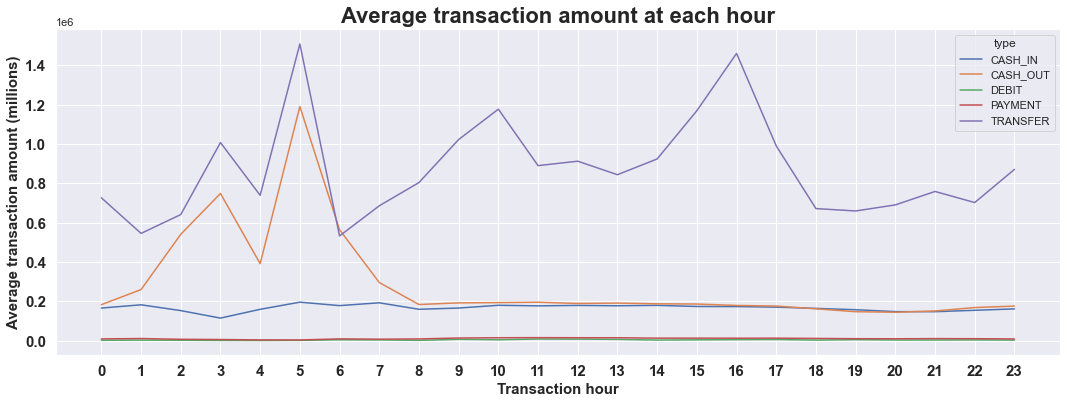

In [69]:
# avg. transaction amount at each hour for each transaction type
plt.figure(figsize=(18,6))
sns.lineplot(data=df_train.groupby(['transactionHour','type']).agg({'amount' : 'mean'}).round(2).reset_index(),
             x='transactionHour',
             y='amount',
             hue='type')
plt.xlabel('Transaction hour', fontsize=15, fontweight='bold')
plt.xticks(range(24), range(24),fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Average transaction amount (millions)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Average transaction amount at each hour', fontsize=22, fontweight='bold')
plt.show()

--

# train 

In [70]:
df_train = df_train.loc[(df_train.type == 'TRANSFER') | (df_train.type == 'CASH_OUT')]

In [71]:
df_train["errorbalanceOrg"] = df_train.newbalanceOrig + df_train.amount - df_train.oldbalanceOrg
df_train["errorbalanceDest"] = df_train.oldbalanceDest + df_train.amount - df_train.newbalanceDest

<ipython-input-71-d498e152ad0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["errorbalanceOrg"] = df_train.newbalanceOrig + df_train.amount - df_train.oldbalanceOrg
<ipython-input-71-d498e152ad0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["errorbalanceDest"] = df_train.oldbalanceDest + df_train.amount - df_train.newbalanceDest


In [72]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['type'], prefix='type')],axis=1) 

In [73]:
df_train = df_train.drop(['nameOrig', 'nameDest', 'isFlaggedFraud',"type","transactionHour"], axis = 1)

In [74]:
y_train = df_train["isFraud"]
X_train = df_train.drop(['isFraud'],axis=1)

In [75]:
# from imblearn.over_sampling import SMOTE 

# sm = SMOTE(random_state=1234)

# X_train, y_train = sm.fit_sample(X_train, y_train)

In [76]:
#y_train.value_counts()

In [77]:
X_train

step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
5717510   398  425900.93        16867.0            0.00       149745.41   
2758578   212  175655.64            0.0            0.00      3393248.63   
3122816   236  159605.73        30915.0            0.00       178107.79   
3676114   276  987883.06        40551.0            0.00        80042.92   
6073550   514  277671.27       103674.0            0.00      7114488.15   
...       ...        ...            ...             ...             ...   
2996434   232  480220.47        10175.0            0.00          797.54   
2134347   183  306912.88        30112.0            0.00       409545.50   
887614     42   92761.84        52434.0            0.00            0.00   
512163     20   77482.84            0.0            0.00       264467.11   
4214666   305   52542.92       693254.0       640711.08      1795877.50   

         newbalanceDest  errorbalanceOrg  errorbalanceDest  type_CASH_OUT  \
5717510       575646.34        409033.93      0.000000e+00              1   
2758578      3568904.28        175655.64     -1.000000e-02              1   
3122816       337713.51        128690.73      1.000000e-02              1   
3676114      1067925.98        947332.06      0.000000e+00              0   
6073550      7392159.42        173997.27      0.000000e+00              1   
...                 ...              ...               ...            ...   
2996434       481018.01        470045.47     -5.820766e-11              1   
2134347       716458.38        276800.88      0.000000e+00              1   
887614         92761.84         40327.84      0.000000e+00              1   
512163        341949.95         77482.84     -5.820766e-11              1   
4214666      1848420.42             0.00      0.000000e+00              1   

         type_TRANSFER  
5717510              0  
2758578              0  
3122816              0  
3676114              1  
6073550              0  
...                ...  
2996434              0  
2134347              0  
887614               0  
512163               0  
4214666              0  

[130138 rows x 10 columns]

# Val

In [78]:
df_val = df_val.loc[(df_val.type == 'TRANSFER') | (df_val.type == 'CASH_OUT')]

df_val["errorbalanceOrg"] = df_val.newbalanceOrig + df_val.amount - df_val.oldbalanceOrg
df_val["errorbalanceDest"] = df_val.oldbalanceDest + df_val.amount - df_val.newbalanceDest

df_val = pd.concat([df_val, pd.get_dummies(df_val['type'], prefix='type')],axis=1) 

df_val = df_val.drop(['nameOrig', 'nameDest', 'isFlaggedFraud',"type"], axis = 1)

In [79]:
y_val = df_val["isFraud"]
X_val= df_val.drop(['isFraud'],axis=1)

#t

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
from sklearn.svm import SVC

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [84]:
import imblearn

In [85]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

In [86]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score,accuracy_score,f1_score,classification_report,precision_recall_curve,confusion_matrix

In [87]:
X_val

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
936965     43    76997.56       56443.00            0.00       623043.12   
1566995   155   218398.60       21266.00            0.00       287110.30   
856998     41   145446.47       20982.67            0.00       466398.50   
937586     43   245348.85           0.00            0.00       508206.74   
792066     40    20393.97         258.00            0.00            0.00   
...       ...         ...            ...             ...             ...   
3594941   262      714.29       25907.00        25192.71      1642946.09   
4597539   328   125033.84           0.00            0.00      1420231.59   
4009636   298  1361649.31       23954.00            0.00       182633.44   
4617438   329   460650.82       10435.00            0.00      1801300.99   
5173615   358    31591.08       63896.00        32304.92            0.00   

         newbalanceDest  errorbalanceOrg  errorbalanceDest  type_CASH_OUT  \
936965        589056.24         20554.56      1.109844e+05              1   
1566995       375482.13        197132.60      1.300268e+05              1   
856998        611844.97        124463.80      0.000000e+00              1   
937586        753555.59        245348.85      0.000000e+00              1   
792066         20393.97         20135.97      0.000000e+00              1   
...                 ...              ...               ...            ...   
3594941      1643660.38             0.00      2.328306e-10              1   
4597539      1545265.44        125033.84     -1.000000e-02              1   
4009636      1544282.75       1337695.31      0.000000e+00              0   
4617438      2261951.81        450215.82      0.000000e+00              1   
5173615        31591.08             0.00      0.000000e+00              1   

         type_TRANSFER  
936965               0  
1566995              0  
856998               0  
937586               0  
792066               0  
...                ...  
3594941              0  
4597539              0  
4009636              1  
4617438              0  
5173615              0  

[43308 rows x 10 columns]

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
RF = RandomForestClassifier(random_state=1)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43179
           1       1.00      1.00      1.00       129

    accuracy                           1.00     43308
   macro avg       1.00      1.00      1.00     43308
weighted avg       1.00      1.00      1.00     43308

[[43179     0]
 [    0   129]]


In [90]:
dtc = DecisionTreeClassifier(random_state=1)

dtc.fit(X_train, y_train)

y_predict = dtc.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43179
           1       0.96      1.00      0.98       129

    accuracy                           1.00     43308
   macro avg       0.98      1.00      0.99     43308
weighted avg       1.00      1.00      1.00     43308

[[43173     6]
 [    0   129]]


In [91]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=1)

X_train, y_train = sm.fit_sample(X_train, y_train)

In [92]:
y_train.value_counts()

1    129751
0    129751
Name: isFraud, dtype: int64

In [93]:
RF = RandomForestClassifier(random_state=1)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43179
           1       0.98      1.00      0.99       129

    accuracy                           1.00     43308
   macro avg       0.99      1.00      0.99     43308
weighted avg       1.00      1.00      1.00     43308

[[43176     3]
 [    0   129]]
